# Titanic Machine Learning

This is a data analysis on Titanic Dataset from [Kaggle](https://www.kaggle.com/c/titanic). This dataset has Titanic passengers data, such as name, gender, age and socio-economic class. The model built in this project will predict survival chances based on passengers features. This is a cleaned version of Kaggle's original dataset.

## About Titanic

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

## Libraries used

* Pandas
* Numpy
* Matplotlib
* Seaborn
* Cufflinks
* SciKit Learn

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import cufflinks         as cf

from sklearn.linear_model import LogisticRegression
from sklearn.metrics      import classification_report

%matplotlib inline

## Reading the Data

The data is in CSV format. We load up the training data, which has some infos about the passengers.

In [3]:
train_data = pd.read_csv('data/titanic_train.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Exploring

Checking for missing information.

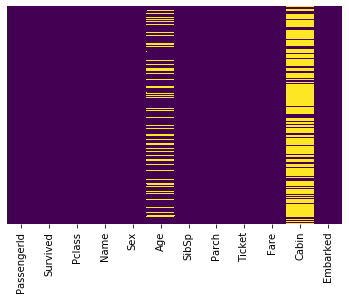

In [7]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Survival rate.

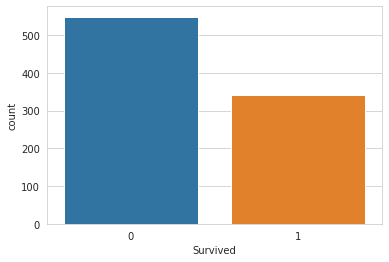

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train_data)

Survival rate by sex.

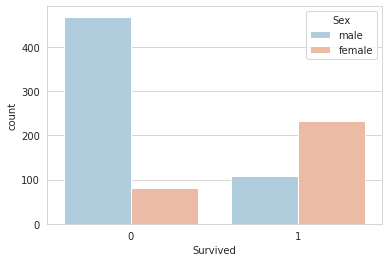

In [12]:
sns.countplot(x='Survived',hue='Sex',data=train_data,palette='RdBu_r')

Survival rate by class.

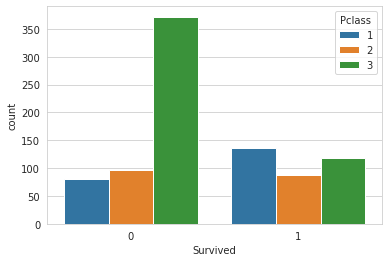

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=train_data)

Age distribution.

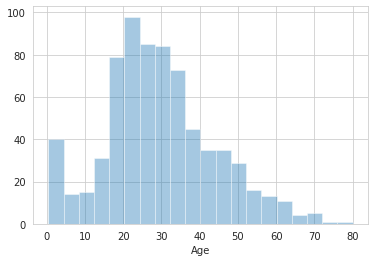

In [16]:
sns.distplot(train_data['Age'].dropna(),kde=False,bins=20)

Number of siblings and spouses on board rate.

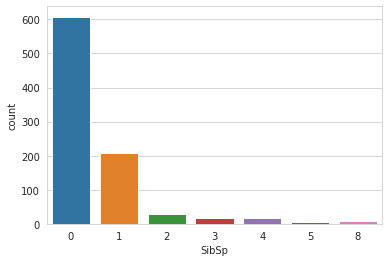

In [17]:
sns.countplot(x='SibSp',data=train_data)

Fare rate. Prices not adjusted for inflation.

In [19]:
cf.go_offline()
train_data['Fare'].iplot(kind='hist',bins=50)

## Data Cleaning

Fill in missing age information with the mean of ages based by class.

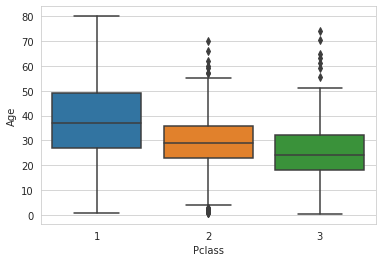

In [20]:
sns.boxplot(x='Pclass',y='Age',data=train_data)

In [28]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [29]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)
train_data.drop('Cabin',axis=1,inplace=True)

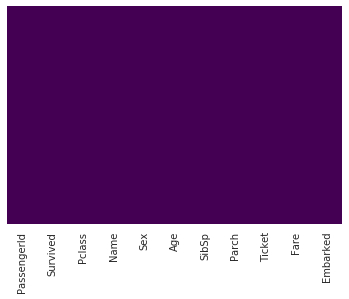

In [34]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)

In [38]:
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

In [39]:
train_data = pd.concat([train_data,sex,embark],axis=1)

In [40]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [41]:
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [44]:
train_data.drop('PassengerId',axis=1,inplace=True)

In [45]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Logistic Regression Model

Split data into training and testing sets.